In [ ]:
# ! pip install ragas

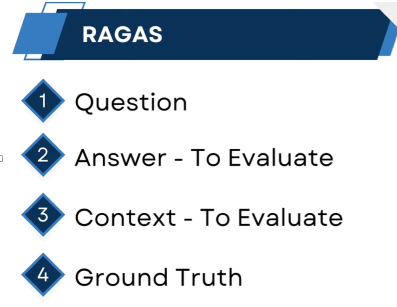
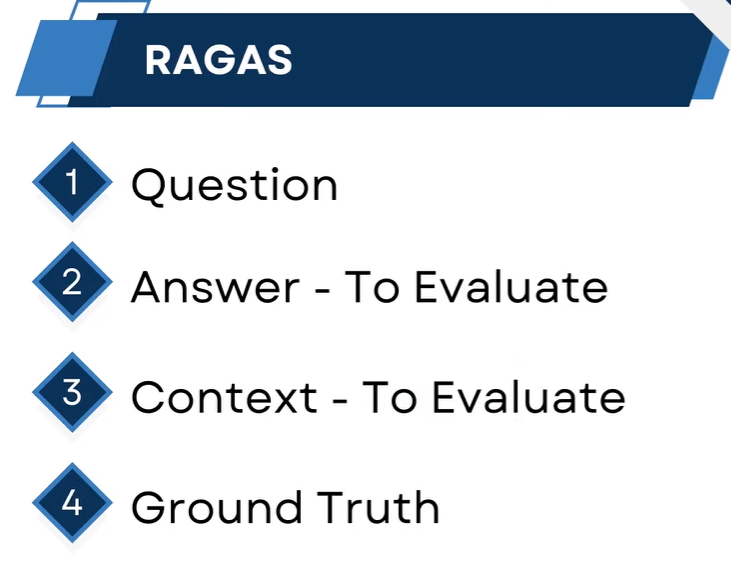

# Faithfulness
The Faithfulness metric measures how factually consistent a response is with the retrieved context. It ranges from 0 to 1, with higher scores indicating better consistency.
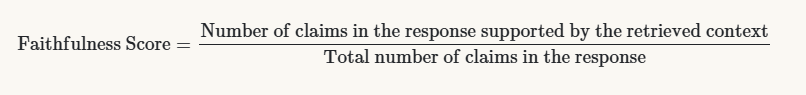

# Answer Correctness

- The assessment of Answer Correctness involves gauging the accuracy of the generated answer when compared to the ground truth. 
- This evaluation relies on the ground truth and the answer, with scores ranging from 0 to 1. A higher score indicates a closer alignment between the generated answer and the ground truth, signifying better correctness.

- Let's calculate the answer correctness for the answer with low answer correctness. It is computed as the sum of factual correctness and the semantic similarity between the given answer and the ground truth.

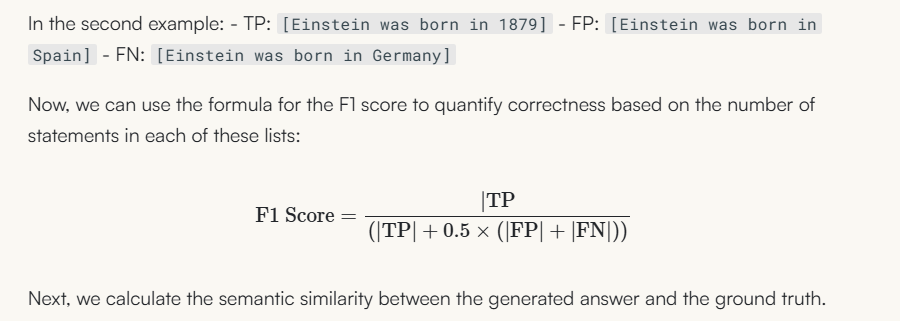

In [ ]:
from datasets import Dataset
import os 
from ragas import evaluate
from ragas.metrics import faithfulness,answer_correctness

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# We are going to evaluate against the Ground Truth
# and identify how effective the RAG application is
data_sample = {
    'question': ['When was the first super bowl?', 
                 'Who won the most super bowls?'],

    'answer': ['The first superbowl was held on Jan 15, 1967', 
               'The most super bowls have been won by The New England Patriots'],

    'contexts': [
        ['The first AFL-NFL World Championship Game was an American footbal game played on January 15, 1967'],
        ['The New England Patriots have won the Super Bowl a record six times'],
    ],
    'ground_truth': ['The first superbowl was held on January 15, 1967',
                     'The New England Patriots have won the Super Bowl a record six times']
}


In [4]:
dataset = Dataset.from_dict(data_sample)

In [ ]:
# export your openai_key on your terminal before running this code

In [ ]:
score= evaluate(dataset, metrics=[faithfulness, answer_correctness])
df=score.to_pandas()
df.to_csv('ragas_evaluation.csv', index=False)